# Homework 2: Univariate Statistics

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

## 0. Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

## 1. Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### For 10 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

MY_UNIQNAME = 'iviev'
Collaborated with: austinam,shruthis,dimac,yaskarba

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
from scipy.stats import norm
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0]) #assigning histogram to 00, spot
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")



count    2200.00
mean       47.80
std         7.76
min        43.36
25%        44.46
50%        45.10
75%        47.54
max       100.00
Name: score, dtype: float64

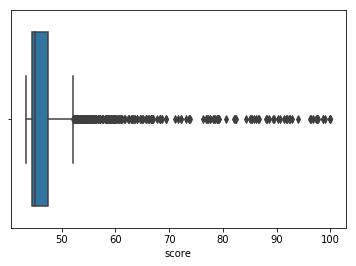

In [3]:
cwur_csv = pd.read_csv("data/cwurData.csv")
# cwur_csv.head(2)
# cwur_yr1 = cwur_csvur_yr1]
cwur_score = cwur_csv['score']
sns.boxplot(x= cwur_score)
cwur_score.describe().round(2)

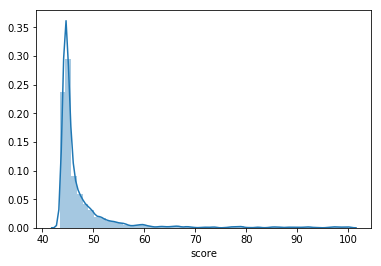

In [4]:
sns.distplot(cwur_score)

The histogram shows that the data is skewed to the right, the mean of he scores in the cwur dataset is 47.80 and the median is 45.10. This shows that most of the schools scored in the lower range. There are a lot of outliers in the higher scores. 

In [5]:
times_csv = pd.read_csv("data/timesData.csv")
times_csv['total_score'] = times_csv['total_score'].replace('-','NaN')
times_csv['total_score'] = times_csv['total_score'].astype(str).astype(float)
#sns.boxplot(x= times_csv['total_score'])
times_csv['total_score'].describe().round(2)

count    1201.00
mean       59.85
std        12.80
min        41.40
25%        50.30
50%        56.00
75%        66.20
max        96.10
Name: total_score, dtype: float64

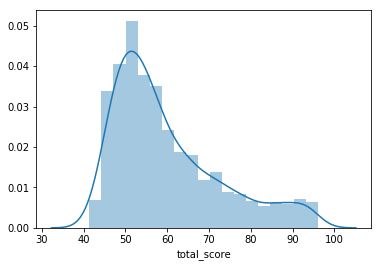

In [6]:
sns.distplot(times_csv['total_score'].dropna())

The histogram shows that this distribution is right skewed. The mean of the times dataset is 59.85 and the median is 56, this tells us that half of the schools have average scores. There are also several outliers in this dataset.

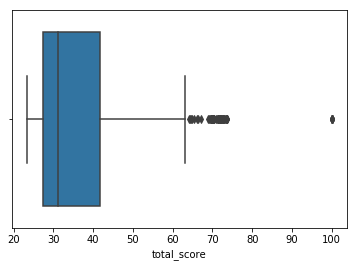

In [7]:
shanghai_csv = pd.read_csv("data/shanghaiData.csv")
shanghai_csv.head(2)
shanghai_csv['world_rank'] = shanghai_csv['world_rank'].str.split('-')
shanghai_csv['world_rank'] = shanghai_csv['world_rank'].apply(lambda x:x[0])
shanghai_csv['national_rank']=shanghai_csv['national_rank'].astype(str)
shanghai_csv['national_rank'] = shanghai_csv['national_rank'].str.split('-')
shanghai_csv['national_rank'] = shanghai_csv['national_rank'].apply(lambda x:x[0])
shanghai_csv['national_rank']=shanghai_csv['national_rank'].astype(float)

# multiplePlots(shanghai_csv['total_score'].dropna())


sns.boxplot(x= shanghai_csv['total_score'])

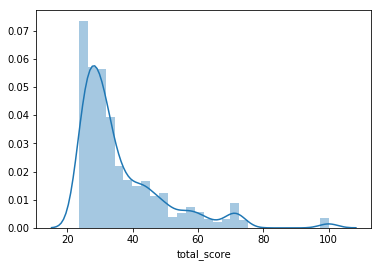

In [8]:
sns.distplot(shanghai_csv['total_score'].dropna())

In [9]:
shanghai_csv['total_score'].describe().round(2)

count    1101.00
mean       36.38
std        13.56
min        23.50
25%        27.40
50%        31.30
75%        41.80
max       100.00
Name: total_score, dtype: float64

The mean for this distribution is 36.38, this is lower than the other datasets. The histogram shows that the distribution is right skewed and also has a wider range. 75% of the school scored below 41.8. This shows that majority of schools scored lower 

### For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2015.

* Plot the distribution using the `multiplePlots` function from Lab 3. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

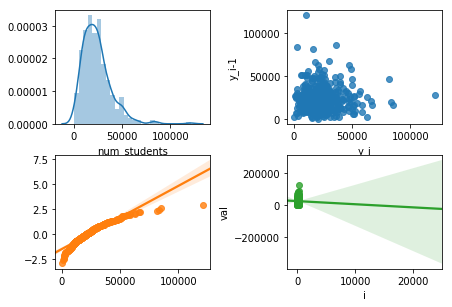

In [10]:
# times_students = times_csv['year'] == 2015
times_csv['num_students'] = times_csv['num_students'].str.replace(',','')
times_students15 = times_csv[times_csv['year'] == 2015]
times_students15

multiplePlots(times_students15['num_students'].astype(float).dropna())



In [11]:
times_students15['num_students'].astype(float).dropna().describe()

count       390.000000
mean      23638.576923
std       14834.339363
min         462.000000
25%       12566.500000
50%       21086.500000
75%       30114.250000
max      120986.000000
Name: num_students, dtype: float64

In [12]:
times_students15['num_students'].astype(float).dropna().median()

21086.5

In [13]:
most_students = times_students15['num_students'] == '120986'
times_students15[most_students]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1722,301-350,Sapienza University of Rome,Italy,32.3,37.5,28.1,50.7,34.2,NaN,120986,32.3,7%,59 : 41,2015


Based on the histogram the distribution of the dataset is right skewed with a mean of 23638 and a median of 21086, the mean and median are similar. The randomness assumption does not hold in the QQ plot. The data doesn't fall randomly above and below the line in the run sequence. The mean was higher than the median because the data is right skewed and has a lot of outliers. The school with the most student is Sapienza University of Rome. 

### For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

count    72.000000
mean     42.230556
std      18.120478
min      15.900000
25%      26.400000
50%      38.600000
75%      57.000000
max      90.900000
Name: international, dtype: float64

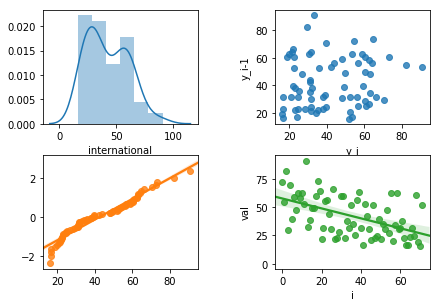

In [54]:
times_csv['international'] = times_csv['international'].replace('-','NaN')
times_csv['international'] = times_csv['international'].astype(str).astype(float)
times_ustudents11 = times_csv[(times_csv.year==2011) & (times_csv.country=='United States of America')]
times_students11 = times_csv[(times_csv.year==2011) & (times_csv.country!='United States of America')]
times_ustudents16 = times_csv[(times_csv.year==2016) & (times_csv.country=='United States of America')]
times_students16 = times_csv[(times_csv.year==2016) & (times_csv.country!='United States of America')]


multiplePlots(times_ustudents11['international'].astype(float).dropna())
times_ustudents11['international'].astype(float).dropna().describe()


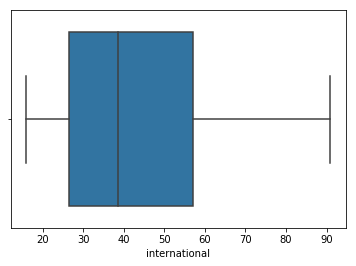

In [15]:
sns.boxplot(x= times_ustudents11['international'])


The graph is slightly skewed to the right, but bimodal, the mean is 42 and the median is 38

count    146.000000
mean      42.431507
std       14.407119
min       17.100000
25%       30.625000
50%       40.200000
75%       52.925000
max       84.000000
Name: international, dtype: float64

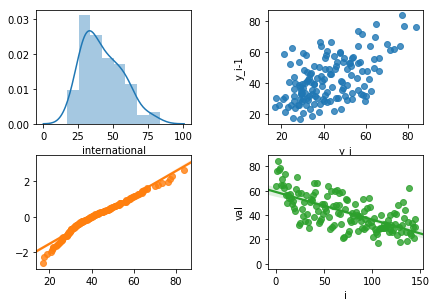

In [16]:
multiplePlots(times_ustudents16['international'].astype(float).dropna())
times_ustudents16['international'].astype(float).dropna().describe()



count    119.000000
mean      61.502521
std       24.147086
min       18.400000
25%       43.600000
50%       63.200000
75%       84.750000
max      100.000000
Name: international, dtype: float64

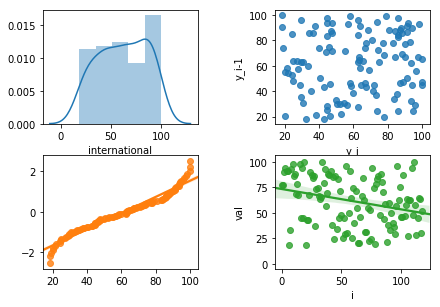

In [17]:
multiplePlots(times_students11['international'].astype(float).dropna())
times_students11['international'].astype(float).dropna().describe()

This graph is slightly left skewed. 

count    654.000000
mean      49.855199
std       25.111324
min        7.100000
25%       27.700000
50%       47.000000
75%       70.900000
max       99.900000
Name: international, dtype: float64

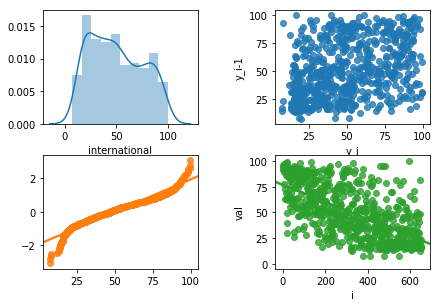

In [18]:
multiplePlots(times_students16['international'].astype(float).dropna())
times_students16['international'].astype(float).dropna().describe()

The histogram for the 2011 data for U.S shows that, the distribution of the data is skewed to the right and bimodal, the mean is 42.2 and the median is 38.6
The histogram shows that the data for 2016 U.S shows the  this distribution is right skewed. The range is 42-84 this shows that no university scored as high as they did in 2011, which had a range of 42-90. 75% of school scored below 52 in the year 2016, most school scored lower


This graph is slightly left skewed for the 2011 data for international schools. The mean and median for this data is 61.5 and 63.2 respectively. There is a slope in the run sequence and the randomness assumption does hold cause there's no clear pattern in the lag plot. 
The qq plot for the 2016 international data shows that it is left skewed. The mean is 49.8 which is much lower than the median for 2011. This shows a decline is scores from 2011 to 2016. 

### For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [19]:
cwur_df = cwur_csv[(cwur_csv.world_rank<101)]
yr2012 = cwur_df[(cwur_df.year == 2012)]
pivot_2012 = yr2012.pivot(index='institution', columns='year', values='score')
pivot_2012 = pivot_2012.sort_values(by=2012, ascending=False)

leaders_table_2012 = pivot_2012.head()
leaders_table_2012



year,2012
institution,
Harvard University,100.00
Massachusetts Institute of Technology,91.67
Stanford University,89.50
University of Cambridge,86.17
California Institute of Technology,85.21


In [20]:
losers_table_2012 = pivot_2012.tail()
losers_table_2012

year,2012
institution,
University of Texas MD Anderson Cancer Center,43.88
University of Nottingham,43.79
University of Bristol,43.77
Utrecht University,43.47
Mines ParisTech,43.36


In [21]:
yr2013 = cwur_df[(cwur_df.year == 2013)]
pivot_2013 = yr2013.pivot(index='institution', columns='year', values='score')
pivot_2013 = pivot_2013.sort_values(by=2013, ascending=False)

leaders_table_2013 = pivot_2013.head()
leaders_table_2013


year,2013
institution,
Harvard University,100.00
Stanford University,93.94
University of Oxford,92.54
Massachusetts Institute of Technology,91.45
University of Cambridge,90.24


In [22]:
losers_table_2013 = pivot_2013.tail()
losers_table_2013

year,2013
institution,
University of Alberta,44.50
Australian National University,44.50
University of Helsinki,44.39
Paris Diderot University - Paris 7,44.36
Georgia Institute of Technology,44.26


In [23]:
yr2014 = cwur_df[(cwur_df.year == 2014)]
pivot_2014 = yr2014.pivot(index='institution', columns='year', values='score')
pivot_2014 = pivot_2014.sort_values(by=2014, ascending=False)

leaders_table_2014 = pivot_2014.head()
leaders_table_2014

year,2014
institution,
Harvard University,100.00
Stanford University,99.09
Massachusetts Institute of Technology,98.69
University of Cambridge,97.64
University of Oxford,97.51


In [24]:
losers_table_2014 = pivot_2014.tail()
losers_table_2014

year,2014
institution,
Tokyo Institute of Technology,51.53
University of Melbourne,51.43
University of Bonn,51.37
Technical University of Munich,51.34
Royal Institute of Technology,51.34


In [25]:
yr2015 = cwur_df[(cwur_df.year == 2015)]
pivot_2015 = yr2015.pivot(index='institution', columns='year', values='score')
pivot_2015 = pivot_2015.sort_values(by=2015, ascending=False)

leaders_table_2015 = pivot_2015.head()
leaders_table_2015

year,2015
institution,
Harvard University,100.00
Stanford University,98.66
Massachusetts Institute of Technology,97.54
University of Cambridge,96.81
University of Oxford,96.46


In [26]:
losers_table_2015 = pivot_2015.tail()
losers_table_2015

year,2015
institution,
University of Zurich,51.14
Arizona State University,51.13
Yonsei University,51.02
University of Oslo,50.81
Kyushu University,50.60


In [27]:
pivot_rank = cwur_df.pivot(index='institution', columns='year', values='world_rank')
# pivot_rank
# pv_dta.columns


In [51]:
ranked_new = pivot_rank.dropna(how=('any'))
ranked_new

year,2012,2013,2014,2015
institution,,,,
Boston University,62.0,54.0,67.0,66.0
Brown University,66.0,77.0,81.0,83.0
California Institute of Technology,5.0,11.0,12.0,12.0
Carnegie Mellon University,43.0,51.0,54.0,61.0
Columbia University,9.0,6.0,6.0,6.0
Cornell University,12.0,13.0,11.0,10.0
Dartmouth College,58.0,82.0,44.0,44.0
Duke University,27.0,25.0,26.0,28.0
Emory University,81.0,93.0,78.0,84.0


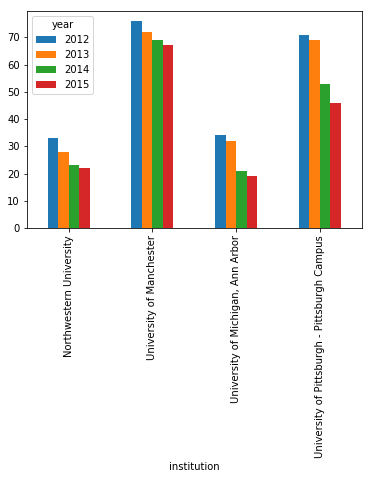

In [52]:
ranks_rising = pivot_rank[(pivot_rank[2012]>pivot_rank[2013])
    &(pivot_rank[2013]>pivot_rank[2014])
    &(pivot_rank[2014]>pivot_rank[2015])]
ranks_rising.plot.bar()

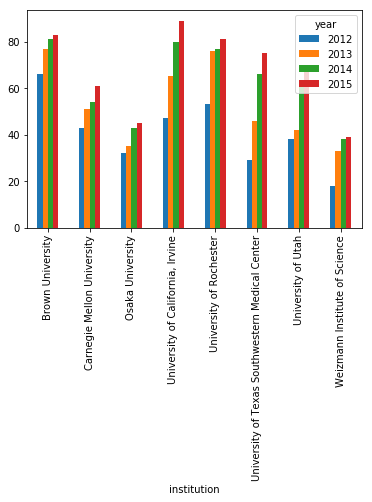

In [31]:
ranks_falling = pivot_rank[(pivot_rank[2012]<pivot_rank[2013])
    &(pivot_rank[2013]<pivot_rank[2014])
    &(pivot_rank[2014]<pivot_rank[2015])]
ranks_falling
ranks_falling.plot.bar()

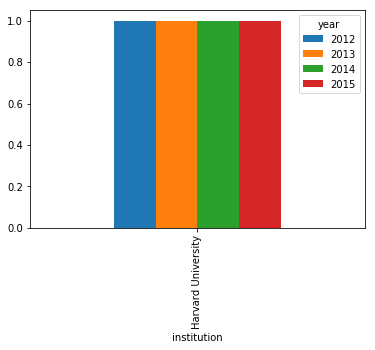

In [32]:
ranks_consistent = pivot_rank[(pivot_rank[2012] == pivot_rank[2013])
    &(pivot_rank[2013] == pivot_rank[2014])
    &(pivot_rank[2014] == pivot_rank[2015])]
ranks_consistent.plot.bar()

82 schools have been ranked consistently in the top 100 each year since they have a listed rank in the top 100 for all of the four years. The table "ranked_new" shows this information. The pivot tables for each year named "pivot_2011 - pivot_2015" show schools that were ranked in top five and bottom five across the years. 

Harvard has been consistent in ranking number one across the years. Brown, Carnegie Mellon, Osaka, University of California Irvine, University of Rochester, University of Texas Southwestern Medical center, Unviersity of Utah and Weizman Institute of Science have fallen in the ranks continously across the years. 
Schools that have risen in the ranks over the years are Northwestern, University of Manchester, University of Michigan, Ann Arbor and University of Pittsburgh. 
 


### For 10 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 2000, but above the average in 2010.

* Sort the nations by difference between 2000 and 2010
* Plot the lag, and explain your answers.

In [33]:
education_csv = pd.read_csv("data/education_expenditure_supplementary_data.csv", lineterminator='\n')
education_csv.head(5)

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN


In [35]:
education_csv['institute_type'] = education_csv['institute_type'].apply(lambda x: x.strip())
education_csv['direct_expenditure_type'] = education_csv['direct_expenditure_type'].apply(lambda x: x.strip())
education_csv = education_csv.rename(columns={'1995': 'average_1995', '2000': 'average_2000', '2005': 'average_2005', '2009': 'average_2009', '2010': 'average_2010', '2011': 'average_2011'})
higher_ed = education_csv[(education_csv.institute_type == 'Higher Education Institutions') & (education_csv.direct_expenditure_type=="Public")]
higher_ed.describe()
avg_nations = higher_ed[(higher_ed.average_2000 < 1.0) & (higher_ed.average_2010 > 1.1)]
avg_nations


,country,institute_type,direct_expenditure_type,average_1995,average_2000,average_2005,average_2009,average_2010,average_2011


In [36]:
higher_ed["Difference"] = higher_ed.average_2010 - higher_ed.average_2000
higher_ed

/Users/valms_94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,institute_type,direct_expenditure_type,average_1995,average_2000,average_2005,average_2009,average_2010,average_2011,Difference
74,OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1,0.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7,0.0
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4,0.3
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3,0.2
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN,0.0
79,Chile,Higher Education Institutions,Public,NaN,0.6,0.3,0.3,0.8,0.7,0.2
80,Czech Republic,Higher Education Institutions,Public,0.7,0.8,0.8,1.0,1.0,1.2,0.2
81,Denmark,Higher Education Institutions,Public,1.3,1.5,1.6,1.8,1.8,1.8,0.3
82,Estonia,Higher Education Institutions,Public,NaN,NaN,0.9,1.3,1.3,1.4,NaN
83,Finland,Higher Education Institutions,Public,1.7,1.7,1.7,1.8,1.9,1.9,0.2


In [37]:
higher_ed.sort_values('Difference')
# higher_ed.sort_values('Difference').tail()



,country,institute_type,direct_expenditure_type,average_1995,average_2000,average_2005,average_2009,average_2010,average_2011,Difference
90,Israel,Higher Education Institutions,Public,NaN,1.1,1.0,1.0,1.0,0.9,-0.1
87,Hungary,Higher Education Institutions,Public,0.8,0.9,0.9,1.0,0.8,1.0,-0.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7,0.0
107,United Kingdom,Higher Education Institutions,Public,0.7,0.7,0.9,0.6,0.7,0.9,0.0
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN,0.0
101,Slovak Republic,Higher Education Institutions,Public,NaN,0.7,0.7,0.7,0.7,0.8,0.0
100,Portugal,Higher Education Institutions,Public,1.0,1.0,0.9,1.0,1.0,1.0,0.0
92,Japan,Higher Education Institutions,Public,0.4,0.5,0.5,0.5,0.5,0.5,0.0
97,New Zealand,Higher Education Institutions,Public,1.1,0.9,0.9,1.1,1.0,1.0,0.1
93,"Korea, Republic of",Higher Education Institutions,Public,0.3,0.6,0.6,0.7,0.7,0.7,0.1


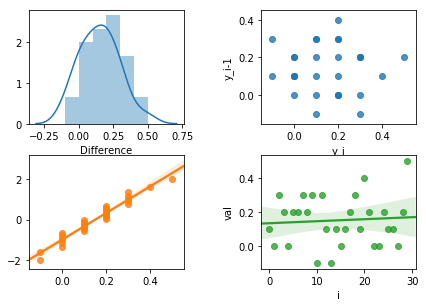

In [38]:
higher_ed_plot = higher_ed['Difference'].round(2)
ed_plot = higher_ed_plot.dropna()
ed_plot
multiplePlots(ed_plot)

# higher_ed.columns

No nations spent below average in 2000 and above average in 2010. Israel and Hungary are the only countires that decreased their expenditure on educaition. The Russia federation spent the most on education. The histogram shows a normal distribution of the data for the difference in education expenditure between 200 and 2010. The randomnesss assumption does not hold based on the lag plot. 

### For 10 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2011 and 2016? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

In [39]:
times_csv['female_male_ratio'] = times_csv['female_male_ratio'].str.split(':')
times_csv['female'] = times_csv['female_male_ratio'].str[0]
times_csv['female'] = times_csv['female'].replace('-','NaN')
times_csv['male'] = times_csv['female_male_ratio'].str[1]
times_csv['male'] = times_csv['male'].replace('-','NaN')


times_csv['new_fm_ratio'] = times_csv['female'].astype(str).astype(float)/times_csv['male'].astype(str).astype(float)

In [40]:
times_csv['new_fm_ratio'] = times_csv['new_fm_ratio'].round(2)
times_csv['new_fm_ratio'] = times_csv['new_fm_ratio'].replace([np.inf, -np.inf], np.nan)

In [41]:
times_csv['new_fm_ratio'].describe()

count    2365.000000
mean        1.067708
std         0.406398
min         0.010000
25%         0.850000
50%         1.080000
75%         1.270000
max         3.550000
Name: new_fm_ratio, dtype: float64

In [42]:
times_csv11 = times_csv[times_csv.year == 2011]
times_csv16 = times_csv[times_csv.year == 2016]


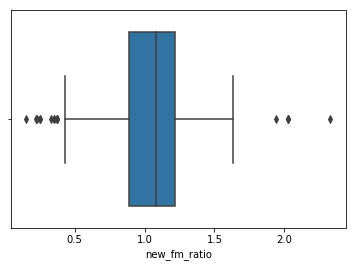

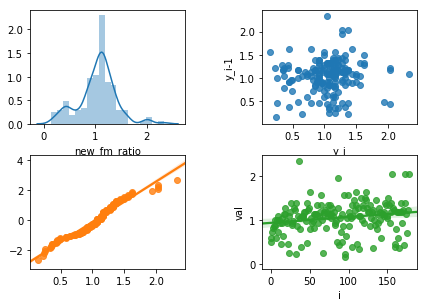

In [45]:
sns.boxplot(x = times_csv11['new_fm_ratio'])
multiplePlots(times_csv11['new_fm_ratio'].dropna())

In [44]:
times_csv11['new_fm_ratio'].describe().round(2)

count    178.00
mean       1.05
std        0.36
min        0.15
25%        0.89
50%        1.08
75%        1.22
max        2.33
Name: new_fm_ratio, dtype: float64

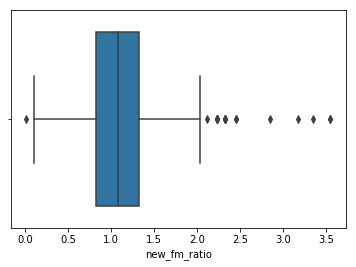

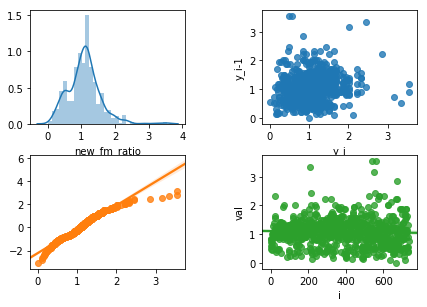

In [47]:
sns.boxplot(x = times_csv16['new_fm_ratio'])
multiplePlots(times_csv16['new_fm_ratio'].dropna())


In [48]:
times_csv16['new_fm_ratio'].describe().round(2)



count    735.00
mean       1.08
std        0.47
min        0.01
25%        0.82
50%        1.08
75%        1.33
max        3.55
Name: new_fm_ratio, dtype: float64

The mean ratio for male and female students for the 2011 times_data is 1.05. This shows that most schools had about an equal number of female and male students. The histogram shows a normal distribution with a range is 0.15 to 2.33
The mean ratio for the 2016 data is 1.08 meaning most schools has apporximately the same number of male and female students. With females being slighhtly higher. The histogram shows a right skewed distribution.


### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [50]:
cwur_rank = cwur_csv[(cwur_csv.national_rank < 6) & (cwur_csv.country == 'USA')]
cwur_rank
# cwur_rank.pivot(index='institution', columns='year', values='national_rank')
# cwur_csv[cwur_rank.year == 2011]
# cwur_csv[(cwur_csv.world_rank<101)]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
101,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,NaN,1,91.45,2013
105,6,Columbia University,USA,4,13,8,9,13,9,11,NaN,10,88.21,2013
106,7,"University of California, Berkeley",USA,5,6,28,6,8,6,4,NaN,19,85.07,2013


(Use this space to explain your answers)